In [12]:
using FITSIO
using Revise
using Healpix
using Falcons
using PyCall
using Base.Threads 
using ProgressMeter
using PyPlot
using LinearAlgebra
using StaticArrays
using HDF5
using DataFrames
using NPZ
using CSV

hp = pyimport("healpy")
np = pyimport("numpy")
ap = pyimport("astropy")
apc = pyimport("astropy.coordinates")
include("/home/cmb/yusuket/scan/functions/calibration.jl")
df = CSV.read("/home/cmb/yusuket/scan/functions/PCCS_broadband_pol_source_list.csv", DataFrame);

In [2]:
ss = gen_ScanningStrategy()
radius_deg = [0.25, 2.5]

ss = gen_ScanningStrategy()
ss.coord = "G"

start_observation_time = "2030-04-01T00:00:00"
println("   timing       : ", start_observation_time)
println("   radius [deg.]: ", radius_deg)
println("   sampling rate: ", ss.sampling_rate)
println("   alpha        : ", ss.alpha)
println("   beta         : ", ss.beta)

start_obs_astroday = ap.time.Time(start_observation_time, scale="tdb")
idxOfday = Vector(0:363)
ss.start_angle = get_start_angle(start_observation_time)
show_ss(ss)

   timing       : 2030-04-01T00:00:00
   radius [deg.]: [0.25, 2.5]
   sampling rate: 1.0
   alpha        : 45.0
   beta         : 50.0
nside                    : 128 
duration [sec]           : 31536000.0 
sampling rate [Hz]       : 1.0 
alpha [deg]              : 45.0 
beta [deg]               : 50.0 
prec. period [min]       : 192.348
↳ prec. rate [rpm]       : 0.005199
spin period [min]        : 20.000
↳ spin rate [rpm]        : 0.050000
HWP rot. rate[rpm]       : 0.000000 
start point              : equator 
start angle              : 3.331092 
coordinate system        : G 
FPU                     
↳ Det.1(θ,φ)             : (0.000, 0.000) 


In [3]:
theta, phi, psi, time = get_pointings_tuple(ss, 0, 60*60*24)
pointing_xyz = ang2xyz(theta, phi);

In [4]:
idx = get_observation_to_compact_sources(pointing_xyz, df.GLAT[1], df.GLON[1], deg2rad(0.5));

In [5]:
planet_vec = get_planet_posision("mars", start_observation_time, "2030-04-01T00:00:00.000")
ang = get_planet_hit_angle(pointing_xyz, planet_vec, ss.sampling_rate);

In [6]:
get_observation_to_compact_sources("mars", pointing_xyz, start_observation_time, "2030-04-01T00:00:00.000", deg2rad(0.5))

Int64[]

In [7]:
n = 1
day = 24*60*60
theta, phi, psi, time = get_pointings_tuple(ss, n * day, (n + 1) * day)
xyz = ang2xyz(theta, phi)

idx = get_observation_to_compact_sources(pointing_xyz, df.GLAT[1], df.GLON[1], deg2rad(0.5));
idx = get_observation_to_compact_sources("mars", pointing_xyz, start_observation_time, "2030-04-01T00:00:00.000", deg2rad(0.5))

Int64[]

In [13]:
hit_angular_distance = deg2rad(0.5)
obs_days = 0:365
start_observation_time = "2030-01-01T00:00:00"
visit_time_pccs, visit_time_planets, attack_angle_pccs, attack_angle_planets = get_visit_time_and_attack_angle_to_compact_sources(ss, obs_days, df, hit_angular_distance);

Days: 2030-04-02T00:00:00.000
path = "/group/cmb/litebird/usr/ytakase/planets_tod/$(planet)/$(start_observation_time)/$(nday).npz" = "/group/cmb/litebird/usr/ytakase/planets_tod/mars/2030-01-01T00:00:00/2030-04-02T00:00:00.000.npz"
path = "/group/cmb/litebird/usr/ytakase/planets_tod/$(planet)/$(start_observation_time)/$(nday).npz" = "/group/cmb/litebird/usr/ytakase/planets_tod/jupiter/2030-01-01T00:00:00/2030-04-02T00:00:00.000.npz"
path = "/group/cmb/litebird/usr/ytakase/planets_tod/$(planet)/$(start_observation_time)/$(nday).npz" = "/group/cmb/litebird/usr/ytakase/planets_tod/uranus/2030-01-01T00:00:00/2030-04-02T00:00:00.000.npz"
path = "/group/cmb/litebird/usr/ytakase/planets_tod/$(planet)/$(start_observation_time)/$(nday).npz" = "/group/cmb/litebird/usr/ytakase/planets_tod/saturn/2030-01-01T00:00:00/2030-04-02T00:00:00.000.npz"
path = "/group/cmb/litebird/usr/ytakase/planets_tod/$(planet)/$(start_observation_time)/$(nday).npz" = "/group/cmb/litebird/usr/ytakase/planets_tod/neptune

In [20]:
int_time_planets = get_integration_time(ss, visit_time_planets)
int_time_pccs = get_integration_time(ss, visit_time_pccs)
attack_angle_info_planets = get_attack_angle_to_compact_sources_quantify(ss, attack_angle_planets)
attack_angle_info_pccs = get_attack_angle_to_compact_sources_quantify(ss, attack_angle_pccs)

([2.4165682111023794, 2.4165682111023794, 2.410385491424596, 2.4877975179364364, 2.4621790969164854, 2.444626621612441, 2.0482496245076875, 2.027203952506323, 2.07016917987453, 2.100470831951122  …  3.463453800084136, 2.207088479041461, 2.2069079245483327, 2.187129285030906, 2.7592953675549285, 2.810532815592248, 2.824122063342847, 2.159514299966792, 2.121181733554602, 2.0517824455730245], [0.6011080332409973, 0.6011080332409973, 0.6011080332409973, 0.5595567867036011, 0.5595567867036011, 0.5595567867036011, 0.48199445983379496, 0.4792243767313019, 0.48199445983379496, 0.5235457063711911  …  0.6398891966759003, 0.4570637119113573, 0.4626038781163435, 0.45983379501385047, 0.6038781163434903, 0.6038781163434903, 0.6094182825484764, 0.4681440443213296, 0.46537396121883656, 0.47091412742382266])

In [25]:
attack_angle_info_pccs

([2.4165682111023794, 2.4165682111023794, 2.410385491424596, 2.4877975179364364, 2.4621790969164854, 2.444626621612441, 2.0482496245076875, 2.027203952506323, 2.07016917987453, 2.100470831951122  …  3.463453800084136, 2.207088479041461, 2.2069079245483327, 2.187129285030906, 2.7592953675549285, 2.810532815592248, 2.824122063342847, 2.159514299966792, 2.121181733554602, 2.0517824455730245], [0.6011080332409973, 0.6011080332409973, 0.6011080332409973, 0.5595567867036011, 0.5595567867036011, 0.5595567867036011, 0.48199445983379496, 0.4792243767313019, 0.48199445983379496, 0.5235457063711911  …  0.6398891966759003, 0.4570637119113573, 0.4626038781163435, 0.45983379501385047, 0.6038781163434903, 0.6038781163434903, 0.6094182825484764, 0.4681440443213296, 0.46537396121883656, 0.47091412742382266])

In [26]:
#compact_sources(int_time_planets, int_time_pccs)
compact_sources(attack_angle_info_planets, int_time_pccs)

LoadError: MethodError: [0mCannot `convert` an object of type [92mTuple{planets, planets}[39m[0m to an object of type [91mplanets[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T at /gpfs/home/cmb/yusuket/.src/julia-1.7.0/share/julia/base/essentials.jl:218
[0m  planets(::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at ~/scan/functions/calibration.jl:220

In [ ]:
idxOfday = Vector(0:365)
angular_distance = deg2rad(0.5)

planet_list = ["mars", "jupiter", "uranus", "saturn", "neptune"]
day = 24*60*60
t_day = ap.time.Time(["2030-04-01T00:00:00", "2030-04-02T00:00:00"], scale="tdb")
astro_day = t_day[2] - t_day[1]

visit_time_pccs = [Float32[] for i in eachindex(df.NAME)]
visit_time_planets = [Float32[] for i in eachindex(planet_list)]
attack_angle_pccs = [Float32[] for i in eachindex(df.NAME)]
attack_angle_planets = [Float32[] for i in eachindex(planet_list)]

for n in eachindex(idxOfday)
    nday = start_obs_astroday + n * astro_day
    theta, phi, psi, time = get_pointings_tuple(ss, n * day, (n + 1) * day)
    pointing_xyz = ang2xyz(theta, phi)
    for j in eachindex(df.NAME)
        idx_pccs = get_observation_to_compact_sources(pointing_xyz, df.GLAT[j], df.GLON[j], angular_distance);
        for i in eachindex(idx_pccs)
            push!(visit_time_pccs[j], time[idx_pccs[i]])
            push!(attack_angle_pccs[j], psi[idx_pccs[i]])
        end
    end
    for j in eachindex(planet_list)
        idx_planets = get_observation_to_compact_sources(planet_list[j], pointing_xyz, start_observation_time, nday.value, angular_distance)
        for i in eachindex(idx_planets)
            push!(visit_time_planets[j], time[idx_planets[i]])
            push!(attack_angle_planets[j], psi[idx_planets[i]])
        end
    end
end

In [ ]:
get_integration_time(ss, visit_planets)
attack_planets
using StatsBase
using Plots

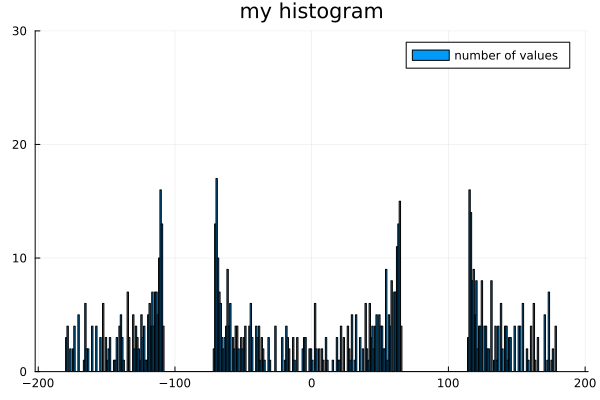

In [104]:
h = fit(Histogram, rad2deg.(attack_angle_pccs[23]), -180:180)
Plots.plot(h, title = "my histogram", label = "number of values", ylim = (0, 30))

In [105]:
144/360

0.4

In [108]:
h.weights |> std
1. - length(h.weights[h.weights .== 0])/360.

a, b = get_attack_angle_quantify(attack_angle_pccs[23])


(3.0075925278153077, 0.5235457063711911)

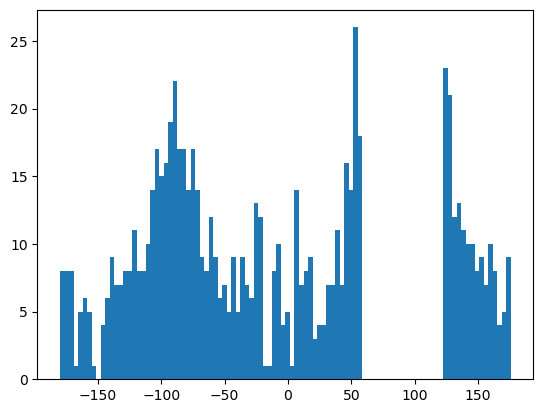

In [36]:
plt.hist(rad2deg.(attack_angle_pccs[1]), bins=100);

In [52]:
hist |> std
1-length(hist[hist.==0])/360

0.6027777777777779

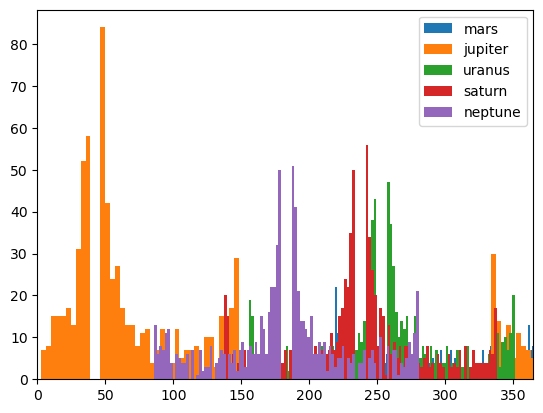

(0.0, 365.0)

In [16]:
for i in eachindex(planet_list)
    plt.hist(visit_time_planets[i]/60/60/24, bins=100, label=planet_list[i]);
end
plt.legend()
plt.xlim(0, 365)

In [17]:
function get_observation_to_compact_sources_vec(planet::String, pointing_xyz, start_observation_time, nday::String, radius)
    planet_vec = get_planet_posision(planet, start_observation_time, nday)
    planet_vec = ecliptic2galactic_vec(planet_vec)
end
NSIDE = 32
NPIX = nside2npix(NSIDE)
maps = zeros(NPIX)

idxOfday = Vector(0:100)

for n in eachindex(idxOfday)
    nday = start_obs_astroday + n * astro_day
    v = get_observation_to_compact_sources_vec("jupiter", pointing_xyz, start_observation_time, nday.value, angular_distance)
    p = hp.vec2pix(NSIDE, v[:,1], v[:,2], v[:,3]) .+ 1
    maps[p] .= 1
end

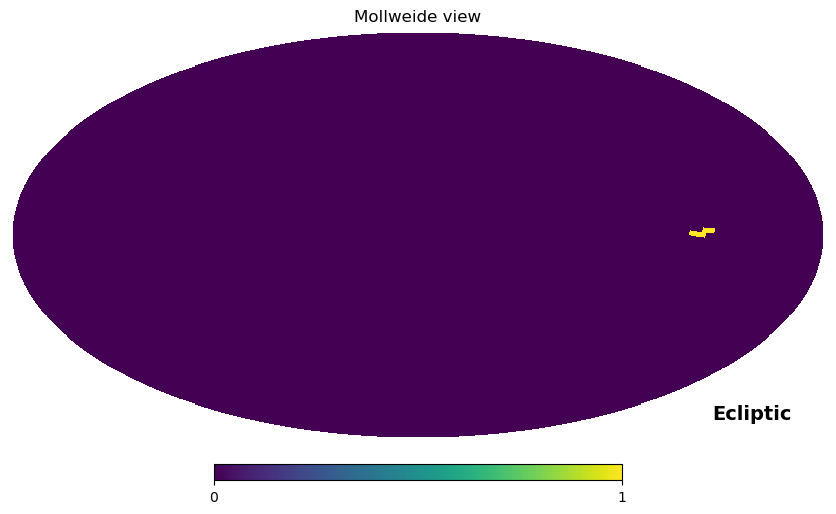

In [18]:
hp.mollview(maps, coord=["G","E"])